In [40]:
# %%============== Import libraries =========
import numpy as np
import pandas as pd
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import stats
from scipy import stats
import plotly.express as px
import my_functions as mf
import plotly.io as pio
import random
import gecon_vs_functions as vl

pio.renderers.default = "browser"
import plotly.graph_objects as go

In [2]:
# %%==============  Define the initial values  =========

range1 = random.sample(range(10, 1024), 50)
range2 = random.sample(range(1025, 5000), 100)
range3 = random.sample(range(5001, 10000), 100)
range4 = random.sample(range(10001, 80000), 100)

tot_users  = range1 + range2 + range3 + range4
# tot_users = (1024, 5000, 8000, 10000, 50000, 80000)

iaas_a_dict = dict()
iaas_b_dict = dict()
caas_dict = dict()

In [3]:
# %%==============  Calculate the total resources per technology by users   =========
# vm_types = ['xsmall', 'small', 'medium', 'large'] 
components = ['nginx', 'framework', 'rel_db', 'mem_db']

# users_size = zip(users, vm_types)
# users_size


In [4]:
for users in tot_users:
    iaas_b_dict[users, 'nginx'] = vl.iaas_b.nginx(users)
    iaas_b_dict[users, 'framework'] = vl.iaas_b.framework(users)
    iaas_b_dict[users, 'rel_db'] = vl.iaas_b.rel_db(users)
    iaas_a_dict[users, 'nginx'] = vl.iaas_a.nginx(users)
    iaas_a_dict[users, 'framework'] = vl.iaas_a.framework(users)
    iaas_a_dict[users, 'rel_db'] = vl.iaas_a.rel_db(users)
    iaas_a_dict[users, 'mem_db'] = vl.iaas_a.memory_db(users)
    caas_dict[users, 'nginx'] = vl.caas.nginx(users)
    caas_dict[users, 'framework'] = vl.caas.framework(users)
    caas_dict[users, 'rel_db'] = vl.caas.rel_db(users)
    caas_dict[users, 'mem_db'] = vl.caas.memory_db(users)
    
# print("iaas_dict", iaas_a_dict)
# print("iaas_dict", iaas_b_dict)
# print("caas_dict", caas_dict)

In [5]:
iaas_a_tot = dict()
iaas_b_tot = dict()
caas_tot = dict()

for users in tot_users:

    iaas_a_tot[users] = vl.iaas_a.total_inst(users)
    iaas_b_tot[users] = vl.iaas_b.total_inst(users)
    caas_tot[users] = vl.caas.total_inst(users)
    
    
# print (iaas_a_tot)

In [6]:
# Convert dictionary to dataframe
iaas_a = pd.DataFrame.from_dict(iaas_a_dict)
iaas_b = pd.DataFrame.from_dict(iaas_b_dict)
caas = pd.DataFrame.from_dict(caas_dict)
iaas_a_inst = pd.DataFrame.from_dict(iaas_a_tot, orient='index')
iaas_b_inst = pd.DataFrame.from_dict(iaas_b_tot, orient='index')
caas_inst = pd.DataFrame.from_dict(caas_tot, orient='index')


In [7]:
# Transpose the dataframes
iaas_a = iaas_a.transpose()
iaas_b = iaas_b.transpose()
caas = caas.transpose()
iaas_a_total = iaas_a_inst
iaas_b_total = iaas_b_inst
caas_total = caas_inst
iaas_a_total


,0,1
886,4,975.0
154,4,975.0
107,4,975.0
745,4,975.0
221,4,975.0
...,...,...
45270,61,13277.5
30298,42,9095.0
25636,36,7950.0
64994,85,18502.5


In [8]:
# Make index to column
iaas_a.reset_index(inplace=True)
iaas_b.reset_index(inplace=True)
caas.reset_index(inplace=True)
iaas_a_total.reset_index(inplace=True)
iaas_b_total.reset_index(inplace=True)
caas_total.reset_index(inplace=True)
iaas_a_total

,index,0,1
0,886,4,975.0
1,154,4,975.0
2,107,4,975.0
3,745,4,975.0
4,221,4,975.0
...,...,...,...
345,45270,61,13277.5
346,30298,42,9095.0
347,25636,36,7950.0
348,64994,85,18502.5


In [9]:
iaas_a = iaas_a.replace({ 'framework': 'NodeJs', 'rel_db': 'postgres', 'mem_db': 'Redis'})
iaas_b = iaas_b.replace({ 'nginx': 'nginx+Redis', 'framework': 'NodeJs', 'rel_db': 'postgres'})
iaas_b

,level_0,level_1,0,1,2,3,4
0,886,nginx+Redis,1,17,13,267.5,iaas_b
1,886,NodeJs,1,33,9,602.5,iaas_b
2,886,postgres,1,25,9,102.5,iaas_b
3,154,nginx+Redis,1,17,13,267.5,iaas_b
4,154,NodeJs,1,33,9,602.5,iaas_b
...,...,...,...,...,...,...,...
1045,64994,NodeJs,1,33,9,602.5,iaas_b
1046,64994,postgres,13,325,117,1332.5,iaas_b
1047,76144,nginx+Redis,75,1275,975,20062.5,iaas_b
1048,76144,NodeJs,2,66,18,1205.0,iaas_b


In [10]:
caas = caas.replace({ 'framework': 'NodeJs', 'rel_db': 'postgres', 'mem_db': 'Redis'})
caas

,level_0,level_1,0,1,2,3,4
0,886,nginx,1,8,8,255,caas
1,886,NodeJs,1,32,8,600,caas
2,886,postgres,1,24,8,100,caas
3,886,Redis,1,8,4,10,caas
4,154,nginx,1,8,8,255,caas
...,...,...,...,...,...,...,...
1395,64994,Redis,7,56,28,70,caas
1396,76144,nginx,75,600,600,19125,caas
1397,76144,NodeJs,2,64,16,1200,caas
1398,76144,postgres,16,384,128,1600,caas


In [11]:
# Rename the columns
iaas_a.columns = ['users', 'component', 'instances', 'RAM', 'CPU', 'STORAGE', 'deployment']
iaas_b.columns = ['users', 'component', 'instances', 'RAM', 'CPU', 'STORAGE', 'deployment']
caas.columns = ['users', 'component', 'instances', 'RAM', 'CPU', 'STORAGE', 'deployment']
iaas_a_total.columns = ['users', 'iaas_a instances', 'storage_iaas_a']
iaas_b_total.columns = ['user', 'iaas_b instances', 'storage_iaas_b']
caas_total.columns = ['use', 'caas instances', 'storage_caas']
iaas_a

,users,component,instances,RAM,CPU,STORAGE,deployment
0,886,nginx,1,9,9,257.5,iaas_a
1,886,NodeJs,1,33,9,602.5,iaas_a
2,886,postgres,1,25,9,102.5,iaas_a
3,886,Redis,1,9,5,12.5,iaas_a
4,154,nginx,1,9,9,257.5,iaas_a
...,...,...,...,...,...,...,...
1395,64994,Redis,7,63,35,87.5,iaas_a
1396,76144,nginx,75,675,675,19312.5,iaas_a
1397,76144,NodeJs,2,66,18,1205.0,iaas_a
1398,76144,postgres,16,400,144,1640.0,iaas_a


In [12]:
# Concatenate the dataframes
frames = [iaas_a, iaas_b, caas]
df = pd.concat(frames, ignore_index=True)
# df = pd.concat([df, disk_type_high], ignore_index=True, axis=1)
# df.columns = ['users', 'component', 'instances', 'RAM', 'CPU', 'STORAGE', 'Disk_type', 'technology']
df.to_csv(f'datasets/user_component_randm.csv')

totals = pd.concat([iaas_a_total, iaas_b_total, caas_total], axis=1)
# totals = totals.rename(columns={0: 'Disk_type'})
totals = totals.drop(columns={'use','user'})
totals.to_csv(f'datasets/total_instances.csv')

totals




,users,iaas_a instances,storage_iaas_a,iaas_b instances,storage_iaas_b,caas instances,storage_caas
0,886,4,975.0,3,1005.5,3,965
1,154,4,975.0,3,1005.5,3,965
2,107,4,975.0,3,1005.5,3,965
3,745,4,975.0,3,1005.5,3,965
4,221,4,975.0,3,1005.5,3,965
...,...,...,...,...,...,...,...
345,45270,61,13277.5,56,14650.0,56,13125
346,30298,42,9095.0,38,10010.0,38,8990
347,25636,36,7950.0,33,8743.0,33,7860
348,64994,85,18502.5,78,20454.5,78,18290


In [43]:
df

,users,component,instances,RAM,CPU,STORAGE,deployment
1471,43,postgres,1,25,9,102.5,iaas_b
1469,43,nginx+Redis,1,17,13,267.5,iaas_b
1470,43,NodeJs,1,33,9,602.5,iaas_b
95,43,Redis,1,9,5,12.5,iaas_a
94,43,postgres,1,25,9,102.5,iaas_a
...,...,...,...,...,...,...,...
1287,79874,Redis,8,72,40,100.0,iaas_a
3736,79874,postgres,16,384,128,1600.0,caas
3735,79874,NodeJs,2,64,16,1200.0,caas
3734,79874,nginx,79,632,632,20145.0,caas


In [44]:
# %% ================ Visualization ========================
#
# Grouped figured with averaged value
fig = px.histogram(df, x="deployment", y=['RAM', 'CPU', 'STORAGE'] ,log_y=True,
                   barmode='group',  histfunc='avg')

fig.update_layout(
    title="Resources IaaS_a vs Iaas_b vs CaaS",
    xaxis_title="Cloud service design",
    yaxis_title="Average resources per users",
    legend_title="Resources",
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
),
    font=dict(
        family="Courier New, monospace",
        size=32,
        color="RebeccaPurple"
    )
)

fig.show()



# fig.write_html("resources_compare.html")
# %%
# fig2 = px.scatter(df, x="users", y=['RAM', 'CPU', 'STORAGE'], facet_col='size', log_y=True)
# fig2.show()
# fig2.write_html("users_resources.html")


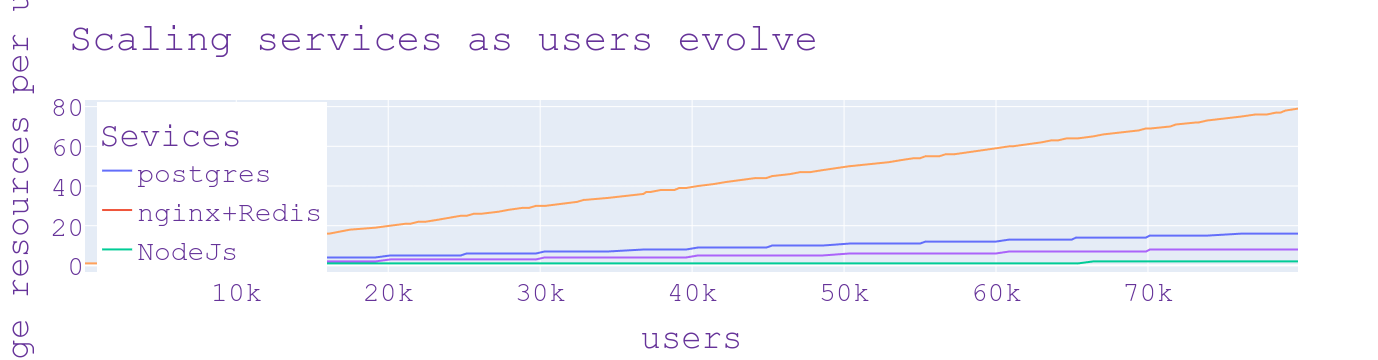

In [14]:
df = df.sort_values(by='users')
fig = px.line(df, x='users', y='instances', color='component', title='Instances evolution per component')

fig.update_layout(
    title="Scaling services as users evolve",
    xaxis_title="users",
    yaxis_title="Average resources per users",
    legend_title="Sevices",
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
),
    font=dict(
        family="Courier New, monospace",
        size=28,
        color="RebeccaPurple"
    )
)

fig.show()


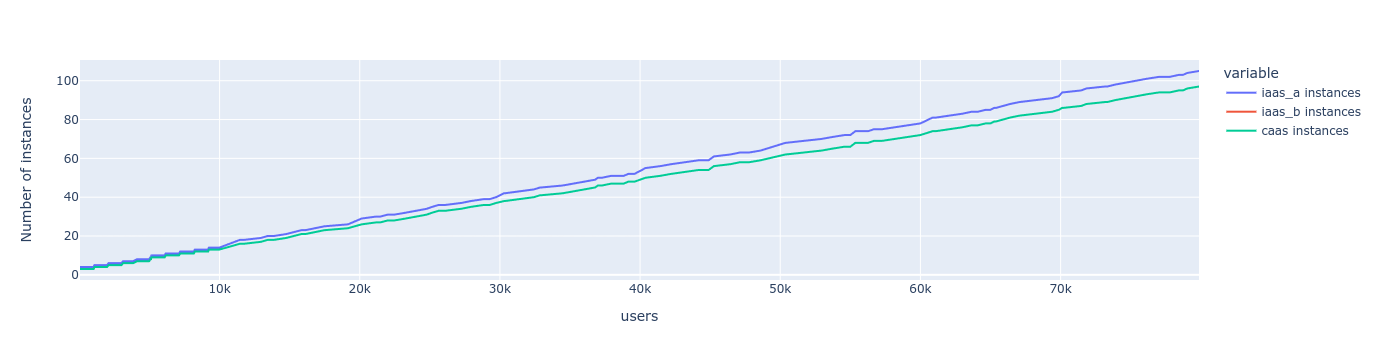

,users,iaas_a instances,storage_iaas_a,iaas_b instances,storage_iaas_b,caas instances,storage_caas
23,43,4,975.0,3,1005.5,3,965
27,53,4,975.0,3,1005.5,3,965
19,55,4,975.0,3,1005.5,3,965
21,88,4,975.0,3,1005.5,3,965
2,107,4,975.0,3,1005.5,3,965
...,...,...,...,...,...,...,...
313,77804,102,22515.0,94,24833.0,94,22260
277,78433,103,22772.5,95,25121.0,95,22515
304,78725,103,22772.5,95,25121.0,95,22515
322,79044,104,23030.0,96,25409.0,96,22770


In [15]:
totals = totals.sort_values(by='users')
fig = px.line(totals, x='users', y=['iaas_a instances', 'iaas_b instances', 'caas instances'],
             labels={
                     "value": "Number of instances"})
fig.show()
totals

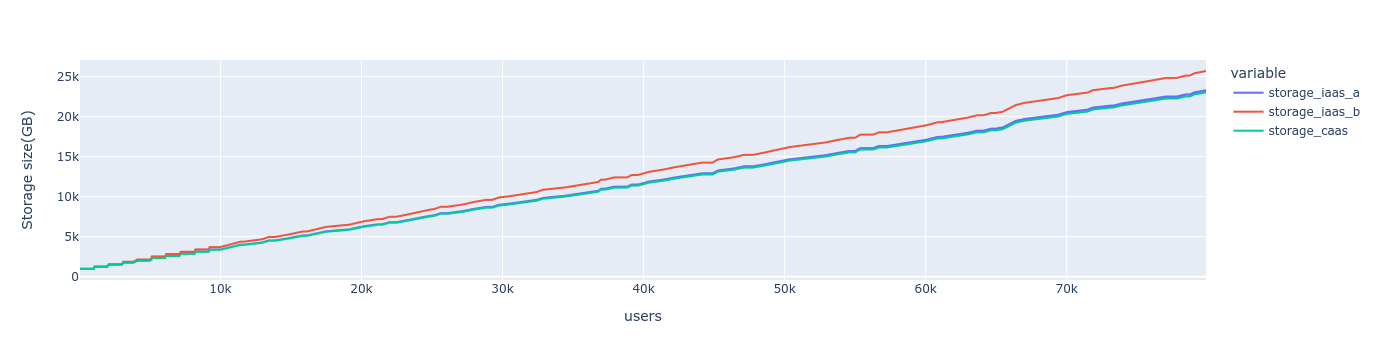

In [16]:
fig = px.line(totals, x='users', y=['storage_iaas_a', 'storage_iaas_b', 'storage_caas'], 
             labels={
                     "value": "Storage size(GB)"})
fig.show()

In [17]:
#####  Amazon IAAS_A price per instance #####################
iaas_a_amazon = {'CPU_RAM': [297.84, 449.68, 297.84 ,148.92], 'Storage': [25.75, 60.25, 10.25, 1.25]}
iaas_a_amazon = pd.DataFrame(iaas_a_amazon, index=['nginx', 'NodeJs', 'postgres', 'Redis'])
iaas_a_amazon

,CPU_RAM,Storage
nginx,297.84,25.75
NodeJs,449.68,60.25
postgres,297.84,10.25
Redis,148.92,1.25


In [18]:
#####  Google IAAS_A price per instance #####################
iaas_a_google = {'CPU_RAM': [187.25, 243.24 , 225.32, 120.41], 'Storage': [43.78, 102.43, 17.43, 2.1]}
iaas_a_google = pd.DataFrame(iaas_a_google, index=['nginx', 'NodeJs', 'postgres', 'Redis'])
iaas_a_google

,CPU_RAM,Storage
nginx,187.25,43.78
NodeJs,243.24,102.43
postgres,225.32,17.43
Redis,120.41,2.10


In [19]:
#####  Microsoft IAAS_A price per instance #####################
iaas_a_microsoft = {'CPU_RAM': [364.27, 364.27, 364.27 ,251.12], 'Storage': [19.2, 76.8, 9.6, 1.2]}
iaas_a_microsoft = pd.DataFrame(iaas_a_microsoft, index=['nginx', 'NodeJs', 'postgres', 'Redis'])
iaas_a_microsoft

,CPU_RAM,Storage
nginx,364.27,19.2
NodeJs,364.27,76.8
postgres,364.27,9.6
Redis,251.12,1.2


In [20]:
#####  Amazon IAAS_B price per instance #####################
iaas_b_amazon = {'CPU_RAM': [297.84, 449.68, 297.84 ], 'Storage': [26.75, 60.25, 12.5]}
iaas_b_amazon = pd.DataFrame(iaas_b_amazon, index=['nginx+Redis', 'NodeJs', 'postgres'])
iaas_b_amazon

,CPU_RAM,Storage
nginx+Redis,297.84,26.75
NodeJs,449.68,60.25
postgres,297.84,12.50


In [21]:
#####  Google IAAS_B price per instance #####################
iaas_b_google = {'CPU_RAM': [274.25, 243.24, 225.32 ], 'Storage': [45.48, 102.43, 17.43]}
iaas_b_google = pd.DataFrame(iaas_b_google, index=['nginx+Redis', 'NodeJs', 'postgres'])
iaas_b_google

,CPU_RAM,Storage
nginx+Redis,274.25,45.48
NodeJs,243.24,102.43
postgres,225.32,17.43


In [22]:
#####  Microsoft IAAS_B price per instance #####################
iaas_b_microsoft = {'CPU_RAM': [502.24, 364.27, 364.27], 'Storage': [38.4, 76.8, 9.6]}
iaas_b_microsoft = pd.DataFrame(iaas_b_microsoft, index=['nginx+Redis', 'NodeJs', 'postgres'])
iaas_b_microsoft

,CPU_RAM,Storage
nginx+Redis,502.24,38.4
NodeJs,364.27,76.8
postgres,364.27,9.6


In [23]:
#####  Amazon CAAS price per instance #####################
caas_amazon = {'CPU_RAM': [148.92, 196.22, 196.22 ,74.46], 'Storage': [25.5, 60, 10, 1]}
caas_amazon = pd.DataFrame(caas_amazon, index=['nginx', 'NodeJs', 'postgres', 'Redis'])
caas_amazon

,CPU_RAM,Storage
nginx,148.92,25.5
NodeJs,196.22,60.0
postgres,196.22,10.0
Redis,74.46,1.0


In [24]:
#####  Google CAAS price per instance #####################
caas_google = {'CPU_RAM': [151.59, 195.67, 187.42, 84.75], 'Storage': [43.35, 102, 17, 1]}
caas_google = pd.DataFrame(caas_google, index=['nginx', 'NodeJs', 'postgres', 'Redis'])
caas_google

,CPU_RAM,Storage
nginx,151.59,43.35
NodeJs,195.67,102.00
postgres,187.42,17.00
Redis,84.75,1.00


In [25]:
#####  Microsoft CAAS price per instance #####################

caas_microsoft = {'CPU_RAM': [280.32, 280.32, 280.32 ,140.16], 'Storage': [19.2, 76.8, 9.6, 1.2]}
caas_microsoft = pd.DataFrame(caas_microsoft, index=['nginx', 'NodeJs', 'postgres', 'Redis'])
caas_microsoft

,CPU_RAM,Storage
nginx,280.32,19.2
NodeJs,280.32,76.8
postgres,280.32,9.6
Redis,140.16,1.2


In [26]:
components = ['nginx', 'NodeJs', 'postgres', 'Redis']
components_b = ['nginx+Redis', 'NodeJs', 'postgres']
cost_columns = ['Amazon_cpu_cost', 'Microsoft_cpu_cost', 'Google_cpu_cost', 'Amazon_storage_cost', 'Microsoft_storage_cost', 'Google_storage_cost'] 
deployments = ['iaas_a' , 'iaas_b', 'caas']

In [27]:


##### Create the columns ###########
iaas_a['Amazon_cpu_cost'] = ''
iaas_a['Google_cpu_cost'] = ''
iaas_a['Microsoft_cpu_cost'] = ''
iaas_b['Amazon_cpu_cost'] = ''
iaas_b['Microsoft_cpu_cost'] = ''
iaas_b['Google_cpu_cost'] = ''
caas['Amazon_cpu_cost'] = ''
caas['Microsoft_cpu_cost'] = ''
caas['Google_cpu_cost'] = ''
iaas_a['Amazon_storage_cost'] = ''
iaas_a['Microsoft_storage_cost'] = ''
iaas_a['Google_storage_cost'] = ''
iaas_b['Amazon_storage_cost'] = ''
iaas_b['Microsoft_storage_cost'] = ''
iaas_b['Google_storage_cost'] = ''
caas['Amazon_storage_cost'] = ''
caas['Microsoft_storage_cost'] = ''
caas['Google_storage_cost'] = ''



for component in components:
    iaas_a['Amazon_cpu_cost']=np.where(iaas_a['component']!=component, iaas_a['Amazon_cpu_cost'], iaas_a['instances']*iaas_a_amazon['CPU_RAM'][component])
    iaas_a['Microsoft_cpu_cost']=np.where(iaas_a['component']!=component, iaas_a['Microsoft_cpu_cost'], iaas_a['instances']*iaas_a_microsoft['CPU_RAM'][component])
    iaas_a['Google_cpu_cost']=np.where(iaas_a['component']!=component, iaas_a['Google_cpu_cost'], iaas_a['instances']*iaas_a_google['CPU_RAM'][component])
    
    
    caas['Amazon_cpu_cost']=np.where(caas['component']!=component, caas['Amazon_cpu_cost'], caas['instances']*caas_amazon['CPU_RAM'][component])
    caas['Microsoft_cpu_cost']=np.where(caas['component']!=component, caas['Microsoft_cpu_cost'], caas['instances']*caas_microsoft['CPU_RAM'][component])
    caas['Google_cpu_cost']=np.where(caas['component']!=component, caas['Google_cpu_cost'], caas['instances']*caas_google['CPU_RAM'][component])
    
    iaas_a['Amazon_storage_cost']=np.where(iaas_a['component']!=component, iaas_a['Amazon_storage_cost'], iaas_a['instances']*iaas_a_amazon['Storage'][component])
    iaas_a['Microsoft_storage_cost']=np.where(iaas_a['component']!=component, iaas_a['Microsoft_storage_cost'], iaas_a['instances']*iaas_a_microsoft['Storage'][component])
    iaas_a['Google_storage_cost']=np.where(iaas_a['component']!=component, iaas_a['Google_storage_cost'], iaas_a['instances']*iaas_a_google['Storage'][component])
    
    caas['Amazon_storage_cost']=np.where(caas['component']!=component, caas['Amazon_storage_cost'], caas['instances']*caas_amazon['Storage'][component])
    caas['Microsoft_storage_cost']=np.where(caas['component']!=component, caas['Microsoft_storage_cost'], caas['instances']*caas_microsoft['Storage'][component])
    caas['Google_storage_cost']=np.where(caas['component']!=component, caas['Google_storage_cost'], caas['instances']*caas_google['Storage'][component])
    
    
for component_b in components_b:
    iaas_b['Amazon_cpu_cost']=np.where(iaas_b['component']!=component_b, iaas_b['Amazon_cpu_cost'], iaas_b['instances']*iaas_b_amazon['CPU_RAM'][component_b])
    iaas_b['Microsoft_cpu_cost']=np.where(iaas_b['component']!=component_b, iaas_b['Microsoft_cpu_cost'], iaas_b['instances']*iaas_b_microsoft['CPU_RAM'][component_b])
    iaas_b['Google_cpu_cost']=np.where(iaas_b['component']!=component_b, iaas_b['Google_cpu_cost'], iaas_b['instances']*iaas_b_google['CPU_RAM'][component_b])
    
    
    iaas_b['Amazon_storage_cost']=np.where(iaas_b['component']!=component_b, iaas_b['Amazon_storage_cost'], iaas_b['instances']*iaas_b_amazon['Storage'][component_b])
    iaas_b['Microsoft_storage_cost']=np.where(iaas_b['component']!=component_b, iaas_b['Microsoft_storage_cost'], iaas_b['instances']*iaas_b_microsoft['Storage'][component_b])
    iaas_b['Google_storage_cost']=np.where(iaas_b['component']!=component_b, iaas_b['Google_storage_cost'], iaas_b['instances']*iaas_b_google['Storage'][component_b])
   



In [28]:
iaas_a

,users,component,instances,RAM,CPU,STORAGE,deployment,Amazon_cpu_cost,Google_cpu_cost,Microsoft_cpu_cost,Amazon_storage_cost,Microsoft_storage_cost,Google_storage_cost
0,886,nginx,1,9,9,257.5,iaas_a,297.84,187.25,364.27,25.75,19.2,43.78
1,886,NodeJs,1,33,9,602.5,iaas_a,449.68,243.24,364.27,60.25,76.8,102.43
2,886,postgres,1,25,9,102.5,iaas_a,297.84,225.32,364.27,10.25,9.6,17.43
3,886,Redis,1,9,5,12.5,iaas_a,148.92,120.41,251.12,1.25,1.2,2.1
4,154,nginx,1,9,9,257.5,iaas_a,297.84,187.25,364.27,25.75,19.2,43.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,64994,Redis,7,63,35,87.5,iaas_a,1042.44,842.87,1757.84,8.75,8.4,14.7
1396,76144,nginx,75,675,675,19312.5,iaas_a,22338.0,14043.75,27320.25,1931.25,1440.0,3283.5
1397,76144,NodeJs,2,66,18,1205.0,iaas_a,899.36,486.48,728.54,120.5,153.6,204.86
1398,76144,postgres,16,400,144,1640.0,iaas_a,4765.44,3605.12,5828.32,164.0,153.6,278.88


In [29]:
iaas_b

,users,component,instances,RAM,CPU,STORAGE,deployment,Amazon_cpu_cost,Microsoft_cpu_cost,Google_cpu_cost,Amazon_storage_cost,Microsoft_storage_cost,Google_storage_cost
0,886,nginx+Redis,1,17,13,267.5,iaas_b,297.84,502.24,274.25,26.75,38.4,45.48
1,886,NodeJs,1,33,9,602.5,iaas_b,449.68,364.27,243.24,60.25,76.8,102.43
2,886,postgres,1,25,9,102.5,iaas_b,297.84,364.27,225.32,12.5,9.6,17.43
3,154,nginx+Redis,1,17,13,267.5,iaas_b,297.84,502.24,274.25,26.75,38.4,45.48
4,154,NodeJs,1,33,9,602.5,iaas_b,449.68,364.27,243.24,60.25,76.8,102.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,64994,NodeJs,1,33,9,602.5,iaas_b,449.68,364.27,243.24,60.25,76.8,102.43
1046,64994,postgres,13,325,117,1332.5,iaas_b,3871.92,4735.51,2929.16,162.5,124.8,226.59
1047,76144,nginx+Redis,75,1275,975,20062.5,iaas_b,22338.0,37668.0,20568.75,2006.25,2880.0,3411.0
1048,76144,NodeJs,2,66,18,1205.0,iaas_b,899.36,728.54,486.48,120.5,153.6,204.86


In [30]:
caas

,users,component,instances,RAM,CPU,STORAGE,deployment,Amazon_cpu_cost,Microsoft_cpu_cost,Google_cpu_cost,Amazon_storage_cost,Microsoft_storage_cost,Google_storage_cost
0,886,nginx,1,8,8,255,caas,148.92,280.32,151.59,25.5,19.2,43.35
1,886,NodeJs,1,32,8,600,caas,196.22,280.32,195.67,60.0,76.8,102.0
2,886,postgres,1,24,8,100,caas,196.22,280.32,187.42,10.0,9.6,17.0
3,886,Redis,1,8,4,10,caas,74.46,140.16,84.75,1.0,1.2,1.0
4,154,nginx,1,8,8,255,caas,148.92,280.32,151.59,25.5,19.2,43.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,64994,Redis,7,56,28,70,caas,521.22,981.12,593.25,7.0,8.4,7.0
1396,76144,nginx,75,600,600,19125,caas,11169.0,21024.0,11369.25,1912.5,1440.0,3251.25
1397,76144,NodeJs,2,64,16,1200,caas,392.44,560.64,391.34,120.0,153.6,204.0
1398,76144,postgres,16,384,128,1600,caas,3139.52,4485.12,2998.72,160.0,153.6,272.0


In [31]:
cost_iaas_a = iaas_a.groupby('users')['Amazon_cpu_cost', 'Amazon_storage_cost', 'Microsoft_cpu_cost', 'Microsoft_storage_cost', 'Google_cpu_cost', 'Google_storage_cost',].sum()
cost_iaas_b = iaas_b.groupby('users')['Amazon_cpu_cost', 'Amazon_storage_cost', 'Microsoft_cpu_cost', 'Microsoft_storage_cost', 'Google_cpu_cost', 'Google_storage_cost',].sum()
cost_caas = caas.groupby('users')['Amazon_cpu_cost', 'Amazon_storage_cost', 'Microsoft_cpu_cost', 'Microsoft_storage_cost', 'Google_cpu_cost', 'Google_storage_cost',].sum()



print (cost_caas)
print (cost_iaas_a)
print (cost_iaas_b)

       Amazon_cpu_cost  Amazon_storage_cost  Microsoft_cpu_cost  \
users                                                             
43              615.82                 96.5              981.12   
53              615.82                 96.5              981.12   
55              615.82                 96.5              981.12   
88              615.82                 96.5              981.12   
107             615.82                 96.5              981.12   
...                ...                  ...                 ...   
77804         15445.56               2226.0            27471.36   
78433         15594.48               2251.5            27751.68   
78725         15594.48               2251.5            27751.68   
79044         15743.40               2277.0            28032.00   
79874         15892.32               2302.5            28312.32   

       Microsoft_storage_cost  Google_cpu_cost  Google_storage_cost  
users                                                     

/tmp/ipykernel_15009/4014797232.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/tmp/ipykernel_15009/4014797232.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/tmp/ipykernel_15009/4014797232.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [32]:

# Convert Series to Dataframe 
frames = (cost_iaas_a, cost_iaas_b, cost_caas)
providers = ('Amazon', 'Google', 'Microsoft', 'deployment')
deployments = ('iaas_a', 'iaas_b', 'caas')

for frame in frames:
    frame = pd.DataFrame(frame)
cost_caas



,Amazon_cpu_cost,Amazon_storage_cost,Microsoft_cpu_cost,Microsoft_storage_cost,Google_cpu_cost,Google_storage_cost
users,,,,,,
43,615.82,96.5,981.12,106.8,619.43,163.35
53,615.82,96.5,981.12,106.8,619.43,163.35
55,615.82,96.5,981.12,106.8,619.43,163.35
88,615.82,96.5,981.12,106.8,619.43,163.35
107,615.82,96.5,981.12,106.8,619.43,163.35
...,...,...,...,...,...,...
77804,15445.56,2226.0,27471.36,1776.0,15588.90,3778.60
78433,15594.48,2251.5,27751.68,1795.2,15740.49,3821.95
78725,15594.48,2251.5,27751.68,1795.2,15740.49,3821.95


In [33]:
for frame in frames:
    sum_Amazon = frame['Amazon_cpu_cost'] + frame['Amazon_storage_cost'] 
    frame['Amazon'] = sum_Amazon
    sum_Google = frame['Google_cpu_cost'] + frame['Google_storage_cost'] 
    frame['Google'] = sum_Google
    sum_Microsoft = frame['Microsoft_cpu_cost'] + frame['Microsoft_storage_cost'] 
    frame['Microsoft'] = sum_Microsoft


cost_caas['deployment'] = 'caas'
cost_iaas_a['deployment'] = 'iaas_a'
cost_iaas_b['deployment'] = 'iaas_b'

total_costA = pd.DataFrame(cost_iaas_a, columns=providers)
total_costB = pd.DataFrame(cost_iaas_b, columns=providers)
total_costC = pd.DataFrame(cost_caas, columns=providers)

framesA = (total_costA, total_costB, total_costC)

total_cost = pd.concat(framesA)
total_cost
total_cost = total_cost.reset_index()
total_cost


,users,Amazon,Google,Microsoft,deployment
0,43,1291.78,941.96,1450.73,iaas_a
1,53,1291.78,941.96,1450.73,iaas_a
2,55,1291.78,941.96,1450.73,iaas_a
3,88,1291.78,941.96,1450.73,iaas_a
4,107,1291.78,941.96,1450.73,iaas_a
...,...,...,...,...,...
1045,77804,17671.56,19367.50,29247.36,caas
1046,78433,17845.98,19562.44,29546.88,caas
1047,78725,17845.98,19562.44,29546.88,caas
1048,79044,18020.40,19757.38,29846.40,caas


In [62]:
fig = px.scatter(total_cost, x="users", y=['Amazon', 'Google', 'Microsoft'], opacity=0.7, 
                 trendline='ols', trendline_scope='trace',  log_y=False,
                 facet_col='deployment', labels={"value": "Cost per month"})

fig.update_layout(
    title="Provider's cost evolution by deployment",
    yaxis_title="Cost per month",
    legend_title="Providers",
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
),
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="RebeccaPurple"
    )
)





results_cost = px.get_trendline_results(fig)
results_cost = results_cost.iloc[1]["px_fit_results"].summary()


print(results_cost)

fig.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.759e+05
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        02:51:02   Log-Likelihood:                -2278.1
No. Observations:                 350   AIC:                             4560.
Df Residuals:                     348   BIC:                             4568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        826.6975     10.821     76.397      0.0

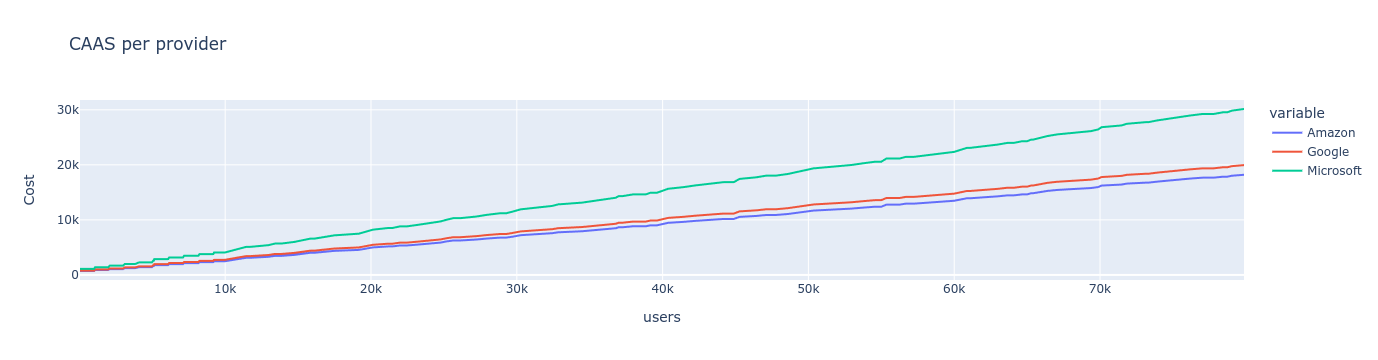

In [35]:
####### Plot user cost per provider##############

fig = px.line(cost_caas, y=['Amazon', 'Google', 'Microsoft'],
             labels={"value": "Cost"}, title='CAAS per provider')
fig.show()

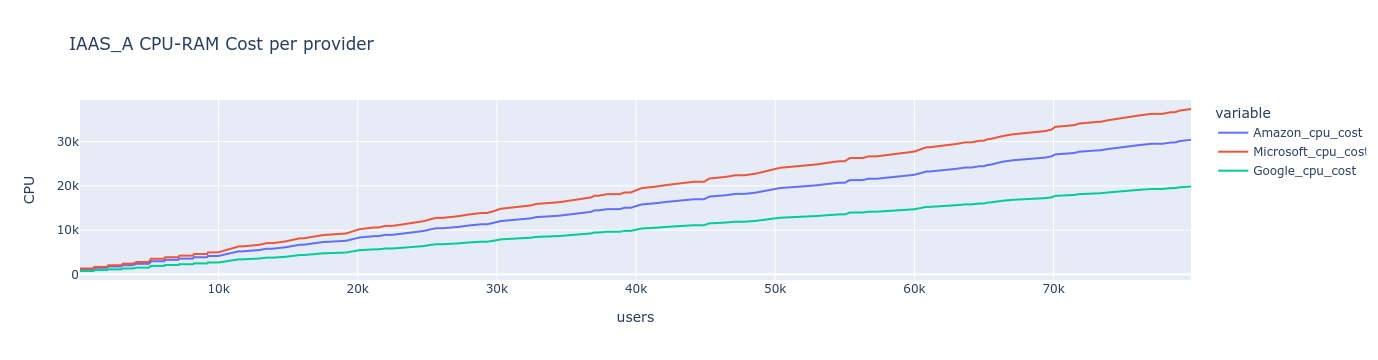

In [36]:
####### Plot user cost per provider##############

fig = px.line(cost_iaas_a, y=['Amazon_cpu_cost', 'Microsoft_cpu_cost', 'Google_cpu_cost'],
             labels={"value": "CPU"}, title='IAAS_A CPU-RAM Cost per provider')
fig.show()


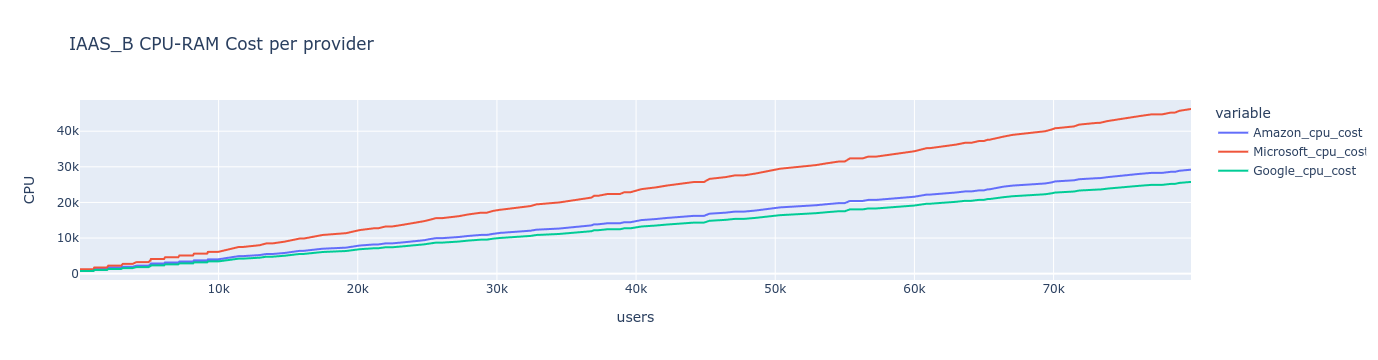

In [37]:
####### Plot user cost per provider##############

fig = px.line(cost_iaas_b, y=['Amazon_cpu_cost', 'Microsoft_cpu_cost', 'Google_cpu_cost'],
             labels={"value": "CPU"}, title='IAAS_B CPU-RAM Cost per provider')
fig.show()


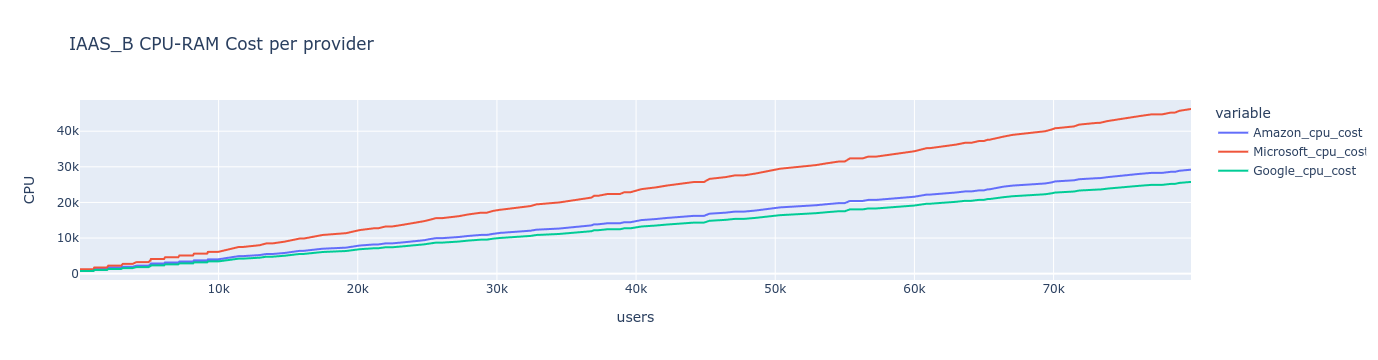

In [38]:
####### Plot user cost per provider##############

fig = px.line(cost_iaas_b, y=['Amazon_cpu_cost', 'Microsoft_cpu_cost', 'Google_cpu_cost'],
             labels={"value": "CPU"}, title='IAAS_B CPU-RAM Cost per provider')
fig.show()

In [39]:
fig2 = px.scatter(df, x="users", y=['RAM', 'CPU', 'STORAGE'], facet_col='size', log_y=True)
fig2.show()

ValueError: Value of 'facet_col' is not the name of a column in 'data_frame'. Expected one of ['users', 'component', 'instances', 'RAM', 'CPU', 'STORAGE', 'deployment'] but received: size